In [1]:
# Morphology 

In [14]:
import cv2
import matplotlib.pyplot as plt

In [15]:
#specific colors from image
# red -> red_plane - gray 
# yellow -> gray - blue
# green -> greeen_plane - gray
# Blue -> blue_plane - gray
# Cyan -> gray - red_plane
# Magenta -> gray - green_plane

img=cv2.imread('color img.jpeg')
img.shape

(1600, 837, 3)

In [16]:
img[:,:,-1].shape

(1600, 837)

In [22]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
red_plane=img[:,:,-1].copy()
green_plane=img[:,:,-2].copy()
blue_plane=img[:,:,-3].copy()


In [23]:
red_color=cv2.subtract(red_plane,gray)
green_color=cv2.subtract(green_plane,gray)
blue_color=cv2.subtract(blue_plane,gray)
cyan_color=cv2.subtract(gray,red_plane)
yellow_color=cv2.subtract(gray,blue_plane)
magenta_color=cv2.subtract(gray,green_plane)

In [24]:
def imshow(im, title ,type= '',):
    if type:
        plt.imshow(im, cmap=type)
    else:
        plt.imshow(im) 
    plt.title(title)
    plt.axis('off')       

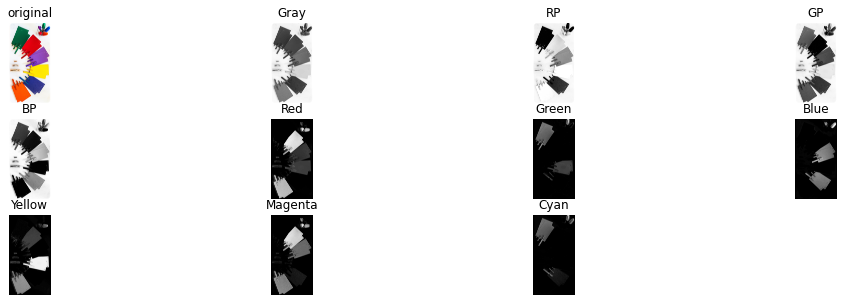

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(3,4,1); imshow(img[:,:,::-1], 'original')
plt.subplot(3,4,2); imshow(gray, 'Gray', 'gray')
plt.subplot(3,4,3); imshow(red_plane, 'RP', 'gray')
plt.subplot(3,4,4); imshow(green_plane, 'GP', 'gray')
plt.subplot(3,4,5); imshow(blue_plane, 'BP', 'gray')
plt.subplot(3,4,6); imshow(red_color, 'Red', 'gray')
plt.subplot(3,4,7); imshow(green_color, 'Green', 'gray')
plt.subplot(3,4,8); imshow(blue_color, 'Blue', 'gray')
plt.subplot(3,4,9); imshow(yellow_color, 'Yellow', 'gray')
plt.subplot(3,4,10); imshow(magenta_color, 'Magenta', 'gray')
plt.subplot(3,4,11); imshow(cyan_color, 'Cyan', 'gray')
plt.show()

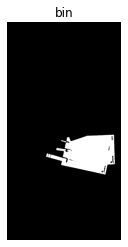

In [27]:
th, y_bw=cv2.threshold(yellow_color,180,255,cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [32]:
import skimage as ski
rp=ski.measure.regionprops(y_bw)
len(rp)

1

In [36]:
rp0=rp[0]
y1,x1,y2,x2=rp0.bbox

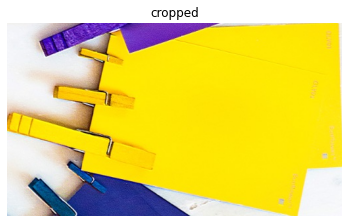

In [37]:
img_cropped=img[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

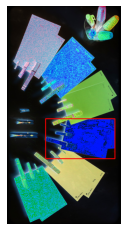

In [38]:
img_copy=-img.copy()
cv2.rectangle(img_copy, (x1,y1),(x2,y2),color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')